In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [2]:
dataset = pd.read_csv('/Users/shuverthikanungo/Desktop/UNI/CSE498R/merged.csv')

In [4]:
print(dataset.shape)

(250034, 3)


In [ ]:
dataset = dataset.drop(columns = ['date'], axis=1)

In [6]:
dataset.head()

,twitter_id,tweet
0,1542505731336708098,b'\xe2\x80\x9cHONEY\xe2\x80\x9d out now!\n\nht...
1,1535435111293865986,"b'RT @RollingStone: Smile for the camera, guys..."
2,1535330970630381569,b'Thank you to everyone for your continued sup...
3,1535330620204716032,b'Go stream \xe2\x80\x9cFALL\xe2\x80\x9d out n...
4,1518946703793086466,b'RT @bigtimerush: Vegas are you ready!? \n\nW...


# Preprocessing 

In [6]:
import codecs

dataset['tweet'] = dataset['tweet'].apply(lambda x: codecs.decode(x, 'unicode_escape'))
dataset['tweet'] = dataset['tweet'].apply(lambda x: x.replace("â", "").replace("â", ""))

In [7]:
def preprocess_text(text):
    if isinstance(text, bytes):
        text = text.decode('latin-1', 'ignore')
    text = re.sub(r'\\[^\w\s]', '', text)
    return text

dataset['tweet'] = dataset['tweet'].apply(preprocess_text)

def preprocess_spaces(text):
    text = str(text)  
    
    text = re.sub(r'\s+', ' ', text)
    
    text = text.strip()
    
    return text

dataset['tweet'] = dataset['tweet'].apply(preprocess_spaces)

from unidecode import unidecode
def preprocess_text(text):
    
    text = text.replace('\n', '')
    
    text = unidecode(text)
    
    return text

dataset['tweet'] = dataset['tweet'].apply(preprocess_text)

def clean_tweet(tweet):
    
    tweet = re.sub(r'#\w+', '', tweet)

    tweet = re.sub(r'http\S+', '', tweet)

    tweet = re.sub(r'@\w+', '', tweet)

    return tweet

dataset['tweet'] = dataset['tweet'].apply(clean_tweet)
dataset.head()


,twitter_id,tweet,sentiment
0,1542505731336708098,b ' HONEY out now,Neutral
1,1535435111293865986,b ' RT Smile for the camera guys has released ...,Positive
2,1535330970630381569,b ' Thank you to everyone for your continued s...,Positive
3,1535330620204716032,b ' Go stream FALL out now Fun fact We we are ...,Positive
4,1518946703793086466,b ' RT Vegas are you ready We are officially p...,Positive


In [9]:
emoticon_mapping = {
    ":)": "smile",
    ":(": "sad",
    ":D": "laugh",
    ":P": "playful",
    ":|": "neutral",
    ":/": "confused",
    ";)": "wink",
    ":O": "surprised"
}

def replace_emoticons(tweet):
    for emoticon, replacement in emoticon_mapping.items():
        tweet = tweet.replace(emoticon, replacement)
    return tweet

dataset['tweet'] = dataset['tweet'].apply(replace_emoticons)
dataset.head()


,twitter_id,tweet
0,1542505731336708098,b'HONEY out now!
1,1535435111293865986,"b'RT : Smile for the camera, guys! has releas..."
2,1535330970630381569,b'Thank you to everyone for your continued sup...
3,1535330620204716032,b'Go stream FALL out now! Fun fact: We weare i...
4,1518946703793086466,b'RT : Vegas are you ready!? Weare officially ...


In [10]:
import emoji

def replace_emojis(tweet):
    return emoji.demojize(tweet)

dataset['tweet'] = dataset['tweet'].apply(replace_emojis)
dataset.head()

,twitter_id,tweet
0,1542505731336708098,b'HONEY out now!
1,1535435111293865986,"b'RT : Smile for the camera, guys! has releas..."
2,1535330970630381569,b'Thank you to everyone for your continued sup...
3,1535330620204716032,b'Go stream FALL out now! Fun fact: We weare i...
4,1518946703793086466,b'RT : Vegas are you ready!? Weare officially ...


In [11]:
import wordninja

def preprocess_concatenated_words(text):
    if text is not None and isinstance(text, str):
        
        words = text.split()
        words = [wordninja.split(word) for word in words]
        words = [word for sublist in words for word in sublist]
        
        preprocessed_text = ' '.join(words)

        return preprocessed_text
    

    return ''

dataset['tweet'] = dataset['tweet'].apply(preprocess_concatenated_words)
dataset.head()

,twitter_id,tweet
0,1542505731336708098,b ' HONEY out now
1,1535435111293865986,b ' RT Smile for the camera guys has released ...
2,1535330970630381569,b ' Thank you to everyone for your continued s...
3,1535330620204716032,b ' Go stream FALL out now Fun fact We we are ...
4,1518946703793086466,b ' RT Vegas are you ready We are officially p...


In [20]:
dataset['tweet'].values[67]

"b ' Some things have been brought to my attention so Zodiac is going back in the vault Love and respect my fans Thanks for the support and understanding '"

# Model Building 

In [ ]:
#Vader Sentiment 

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

song_titles = ["Another Song Title", "Yet Another Song"]

assigned_sentiments = []

for tweet in dataset['tweet']:
    sentiment_scores = sia.polarity_scores(tweet)
    compound_score = sentiment_scores['compound']

    for title in song_titles:
        if title.lower() in tweet.lower():
            sentiment = 'Positive'
            break
    else:
        if compound_score >= 0.05:
            sentiment = 'Positive'
        elif compound_score <= -0.05:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'

    assigned_sentiments.append(sentiment)


dataset['sentiment'] = assigned_sentiments

dataset.to_csv('merged.csv', index=False) 

print("Sentiments added to the dataset and saved to 'merged.csv'.")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shuverthikanungo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiments added to the dataset and saved to 'merged.csv'.


# Model Training

In [ ]:
#Logistic Regression

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = dataset['tweet']
Y = dataset['sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_test_scaled = scaler.transform(X_test_vectorized)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9356090147379367


In [87]:
results = pd.DataFrame({'Original Sentiment': Y_test}).reset_index(drop=True)
results['Predicted Sentiment'] = Y_pred

print(results)

      Original Sentiment Predicted Sentiment
0                Neutral             Neutral
1               Negative            Negative
2               Positive            Positive
3               Positive            Positive
4               Positive            Positive
...                  ...                 ...
50002            Neutral             Neutral
50003           Negative            Positive
50004           Positive            Positive
50005            Neutral             Neutral
50006            Neutral             Neutral

[50007 rows x 2 columns]


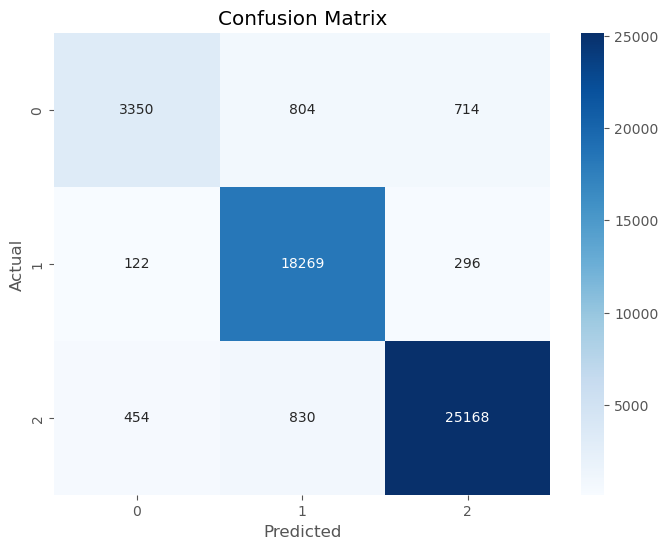

              precision    recall  f1-score   support

    Negative       0.85      0.69      0.76      4868
     Neutral       0.92      0.98      0.95     18687
    Positive       0.96      0.95      0.96     26452

    accuracy                           0.94     50007
   macro avg       0.91      0.87      0.89     50007
weighted avg       0.93      0.94      0.93     50007



In [88]:
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

report = classification_report(Y_test, Y_pred)
print(report)

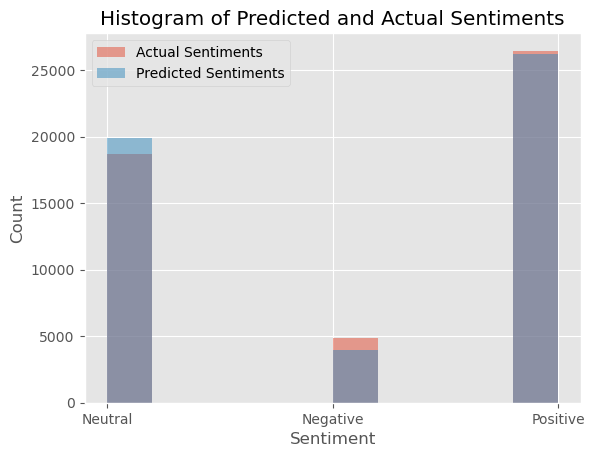

In [89]:
fig, ax = plt.subplots()

ax.hist(Y_test, alpha=0.5, label='Actual Sentiments')

ax.hist(Y_pred, alpha=0.5, label='Predicted Sentiments')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Histogram of Predicted and Actual Sentiments')

ax.legend()

plt.show()

In [ ]:
#Random Forest

In [90]:
dataset1 = dataset.head(50000)

In [91]:
print(dataset1.shape)

(50000, 3)


In [92]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

X = dataset1['tweet']
Y = dataset1['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_test_scaled = scaler.transform(X_test_vectorized)

oversampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = oversampler.fit_resample(X_train_scaled, Y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_balanced, Y_train_balanced)

Y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8349


In [93]:
results = pd.DataFrame({'Original Sentiment': Y_test}).reset_index(drop=True)
results['Predicted Sentiment'] = Y_pred

print(results)

     Original Sentiment Predicted Sentiment
0               Neutral             Neutral
1               Neutral            Positive
2               Neutral             Neutral
3               Neutral             Neutral
4              Positive            Positive
...                 ...                 ...
9995            Neutral             Neutral
9996            Neutral             Neutral
9997            Neutral             Neutral
9998            Neutral            Positive
9999            Neutral             Neutral

[10000 rows x 2 columns]


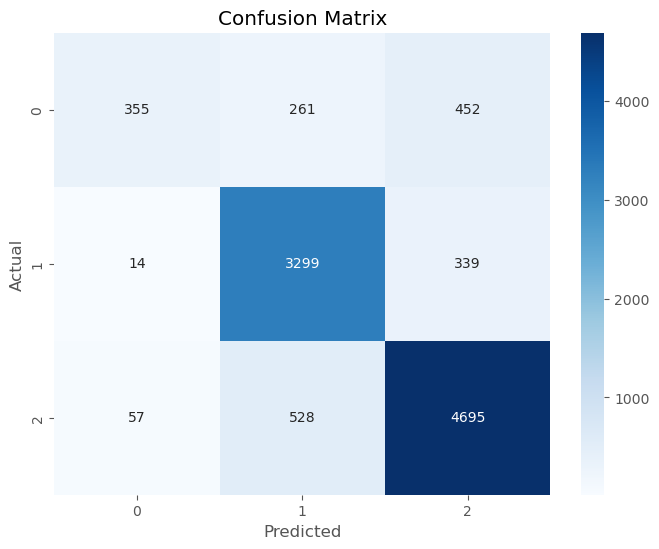

              precision    recall  f1-score   support

    Negative       0.83      0.33      0.48      1068
     Neutral       0.81      0.90      0.85      3652
    Positive       0.86      0.89      0.87      5280

    accuracy                           0.83     10000
   macro avg       0.83      0.71      0.73     10000
weighted avg       0.84      0.83      0.82     10000



In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

report = classification_report(Y_test, Y_pred)
print(report)

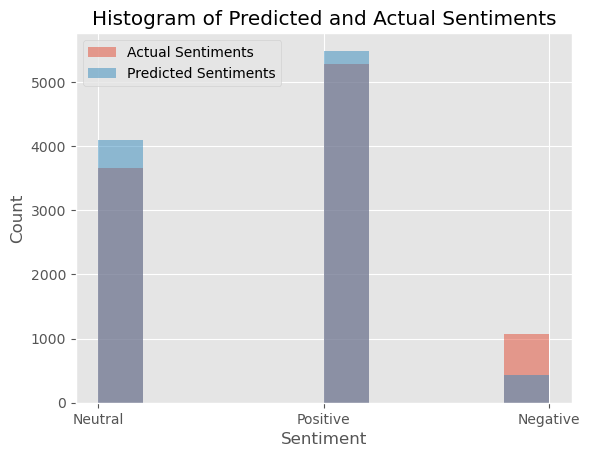

In [95]:
fig, ax = plt.subplots()

ax.hist(Y_test, alpha=0.5, label='Actual Sentiments')

ax.hist(Y_pred, alpha=0.5, label='Predicted Sentiments')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Histogram of Predicted and Actual Sentiments')

ax.legend()

plt.show()

In [ ]:
#SVM 

In [96]:
dataset2 = dataset.head(10000)

In [97]:
print(dataset2.shape)

(10000, 3)


In [98]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

X = dataset2['tweet']
Y = dataset2['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_test_scaled = scaler.transform(X_test_vectorized)

oversampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = oversampler.fit_resample(X_train_scaled, Y_train)

model = SVC(kernel='linear')
model.fit(X_train_balanced, Y_train_balanced)

Y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8915


In [99]:
results = pd.DataFrame({'Original Sentiment': Y_test}).reset_index(drop=True)
results['Predicted Sentiment'] = Y_pred

print(results)

     Original Sentiment Predicted Sentiment
0              Positive             Neutral
1              Positive             Neutral
2               Neutral             Neutral
3              Negative            Negative
4              Positive            Positive
...                 ...                 ...
1995           Negative            Negative
1996            Neutral             Neutral
1997           Positive            Positive
1998            Neutral             Neutral
1999           Positive            Positive

[2000 rows x 2 columns]


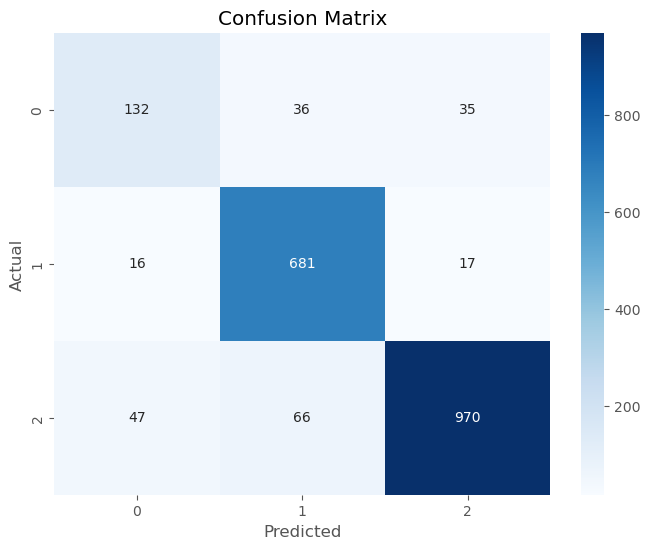

              precision    recall  f1-score   support

    Negative       0.68      0.65      0.66       203
     Neutral       0.87      0.95      0.91       714
    Positive       0.95      0.90      0.92      1083

    accuracy                           0.89      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.89      0.89      0.89      2000



In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

report = classification_report(Y_test, Y_pred)
print(report)

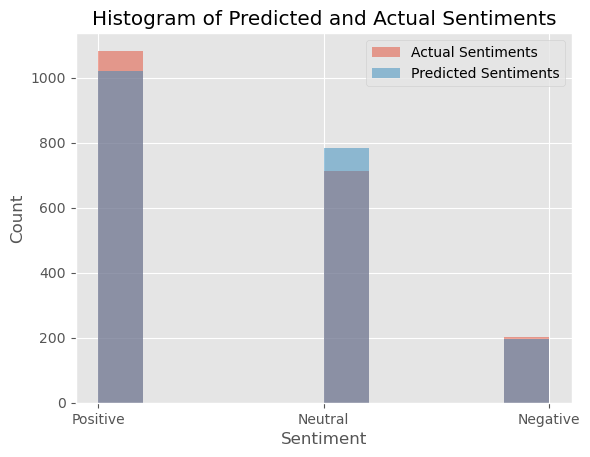

In [101]:
fig, ax = plt.subplots()

ax.hist(Y_test, alpha=0.5, label='Actual Sentiments')

ax.hist(Y_pred, alpha=0.5, label='Predicted Sentiments')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Histogram of Predicted and Actual Sentiments')

ax.legend()

plt.show()

In [102]:
#Naive Bayes

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

X = dataset['tweet']
Y = dataset['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_test_scaled = scaler.transform(X_test_vectorized)

oversampler = RandomOverSampler(random_state=42)
X_train_balanced, Y_train_balanced = oversampler.fit_resample(X_train_scaled, Y_train)

model = MultinomialNB()
model.fit(X_train_balanced, Y_train_balanced)

Y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.737385183506419


In [104]:
results = pd.DataFrame({'Original Sentiment': Y_test}).reset_index(drop=True)
results['Predicted Sentiment'] = Y_pred

print(results)

      Original Sentiment Predicted Sentiment
0                Neutral             Neutral
1               Negative            Negative
2               Positive            Positive
3               Positive             Neutral
4               Positive            Positive
...                  ...                 ...
75006            Neutral            Negative
75007           Positive            Positive
75008           Positive            Positive
75009            Neutral            Negative
75010           Positive            Positive

[75011 rows x 2 columns]


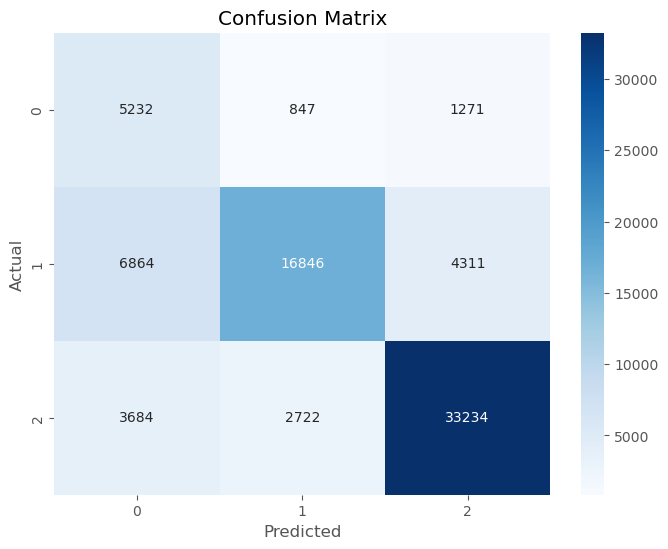

              precision    recall  f1-score   support

    Negative       0.33      0.71      0.45      7350
     Neutral       0.83      0.60      0.70     28021
    Positive       0.86      0.84      0.85     39640

    accuracy                           0.74     75011
   macro avg       0.67      0.72      0.67     75011
weighted avg       0.79      0.74      0.75     75011



In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

report = classification_report(Y_test, Y_pred)
print(report)

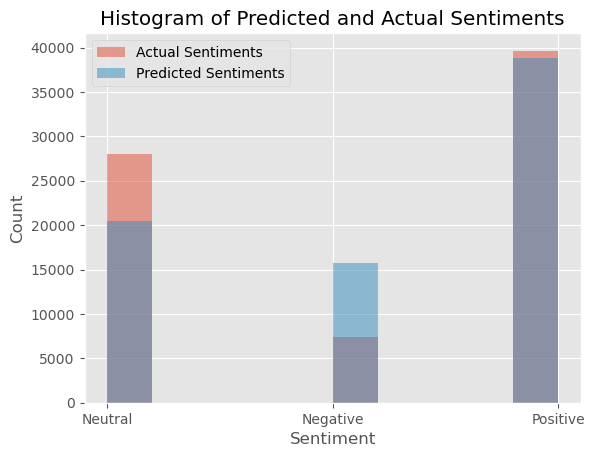

In [106]:
fig, ax = plt.subplots()

ax.hist(Y_test, alpha=0.5, label='Actual Sentiments')

ax.hist(Y_pred, alpha=0.5, label='Predicted Sentiments')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Histogram of Predicted and Actual Sentiments')

ax.legend()

plt.show()